# End Semester Component

### Task One ###

a) Find the gradient of the attached image in each direction (horizontal Gx and vertical Gy) using Sobel, Prewitt and Robert approximation methods and display the horizontal, vertical and combined edges.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
image = cv2.imread('C:\\Users\\USER\\OneDrive\\Desktop\\Computer Vision\\Ese Component\\Set-3-q1.jpg', 0) 

Applying Sobel Filter

In [4]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

Applying Prewitt Filter

In [5]:
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y)
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

Applying Robert Filter

In [6]:
robert_kernel_x = np.array([[1, 0], [0, -1]])
robert_kernel_y = np.array([[0, 1], [-1, 0]])
robert_x = cv2.filter2D(image, -1, robert_kernel_x)
robert_y = cv2.filter2D(image, -1, robert_kernel_y)
robert_edges = np.sqrt(robert_x**2 + robert_y**2)

Displaying the Image

ValueError: num must be an integer with 1 <= num <= 6, not 7

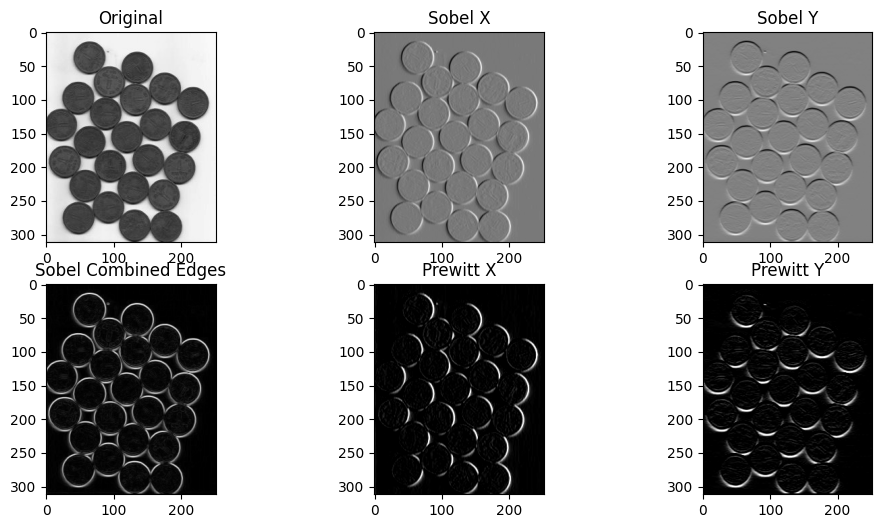

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.plt.figure(figsize=(12, 6))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(233), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(234), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Combined Edges')

plt.subplot(235), plt.imshow(prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(236), plt.imshow(prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.subplot(237), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Combined Edges')

plt.subplot(238), plt.imshow(robert_x, cmap='gray'), plt.title('Robert X')
plt.subplot(239), plt.imshow(robert_y, cmap='gray'), plt.title('Robert Y')
plt.subplot(2,3,10), plt.imshow(robert_edges, cmap='gray'), plt.title('Robert Combined Edges')

plt.show()
plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(233), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(234), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Combined Edges')

plt.subplot(235), plt.imshow(prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(236), plt.imshow(prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.subplot(237), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Combined Edges')

plt.subplot(238), plt.imshow(robert_x, cmap='gray'), plt.title('Robert X')
plt.subplot(239), plt.imshow(robert_y, cmap='gray'), plt.title('Robert Y')
plt.subplot(2,3,10), plt.imshow(robert_edges, cmap='gray'), plt.title('Robert Combined Edges')

plt.show()


**Inference**

Thus the task to find the gradient of the image using Sobel, Prewitt, Robert has been implemented successfully.

b) Interpret the results of the above three methods and justify how magnitude of gradient operator is used to detect the edges.

**Interpretation**

Sobel filter is very effective in edge detection. It detects the true edges. It is widely used in edge detection techniques. Gradient operator is used to detect the edges. Because it combines both the vertical and horizontal with magnitudes. Performed this using cv2 library.

First Order Derivative - Sobel Filter

Second Order Derivative - Laplacian with Gaussian

Third Order Derivative - Canny Edge Detection

### Task Two ###


Feature Extraction


#### i) Extract the type of image feature that is embedded in the areas of constant or nearly constant intensity area in an image. ####

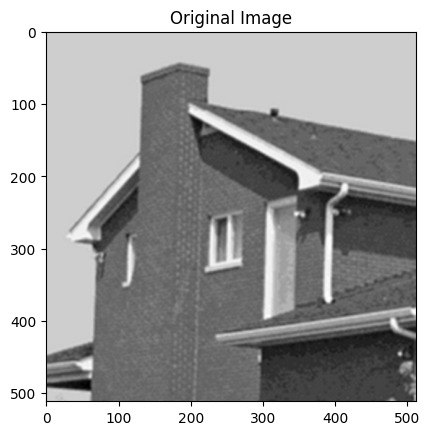

In [9]:
image = cv2.imread('C:\\Users\\USER\\OneDrive\\Desktop\\Computer Vision\\Ese Component\\set-3-q2.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()
     

Point Detection

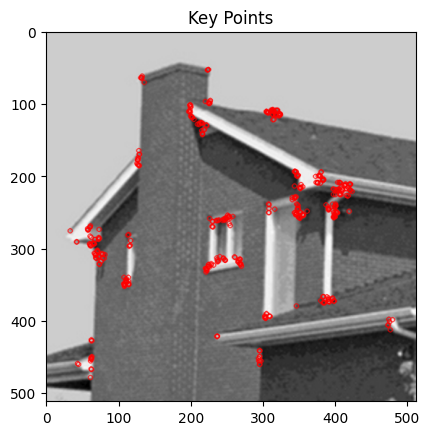

In [10]:
orb = cv2.ORB_create()
keypoints = orb.detect(image, None)

keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(255,0,0), flags=0)
plt.imshow(keypoint_image)
plt.title('Key Points')
plt.show()
     

**Inference**

Detected key points in the image using ORB (Oriented fast and rotated brief). It is better than SIFT and SURF.

Object recognition and tracking, Augmented Reality, Medical image analysis these are some of the applications of detecting key points from the image.

Edge Detection

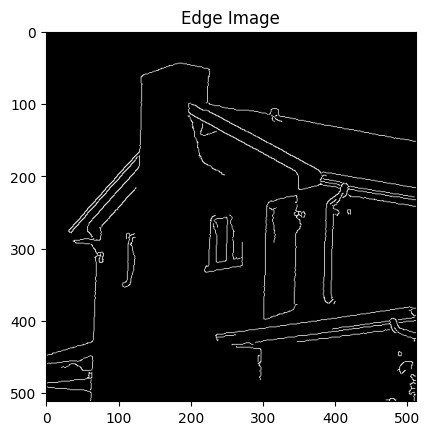

In [11]:
edges = cv2.Canny(image, 100, 200) # Upper and lower threshold

plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.show()
     

**Inference**

Detected the edge feature of the image by using canny edge detection technique.

Edge Detection involves identifying significant transitions in intensity in an image. These transitions corresponds to object boundaries, lines etc.

Line Detection

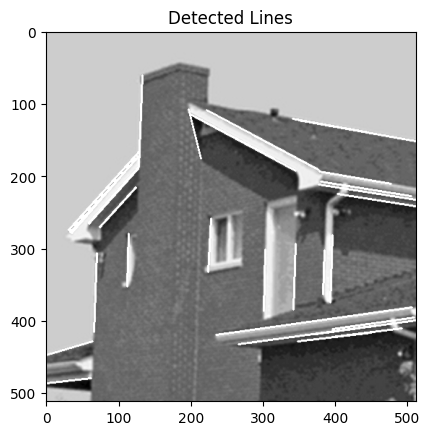

In [13]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

line_image = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(line_image, cmap='gray')
plt.title('Detected Lines')
plt.show()

**Inference**

Detected the lines by using HoughLines transform technique. Detecting lines involves identifying the structure or outline of objects within images by recognizing straight lines, which can be crucial for further analysis or processing.

Line detection can be useful in medical imaging, tracking road lanes etc.

#### ii) Extract horizontal and vertical lines in the image ####

Detecting horizontal and vertical lines using HoughLines Transform

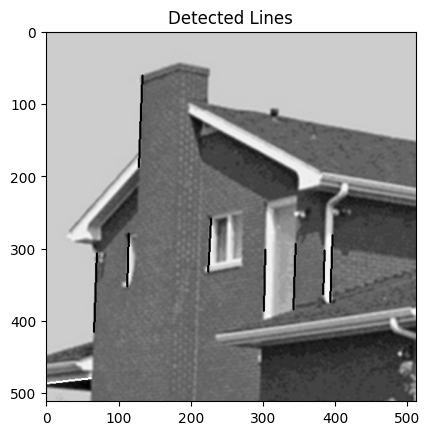

In [14]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

line_image = image.copy()

tolerance = 10

for line in lines:
    x1, y1, x2, y2 = line[0]
    if abs(y2 - y1) < tolerance:  # Horizontal line
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    elif abs(x2 - x1) < tolerance:  # Vertical line
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.show()



#### iii) Extract +45-degree slanting line and -45-degree slanting line ####

Detecting Angles

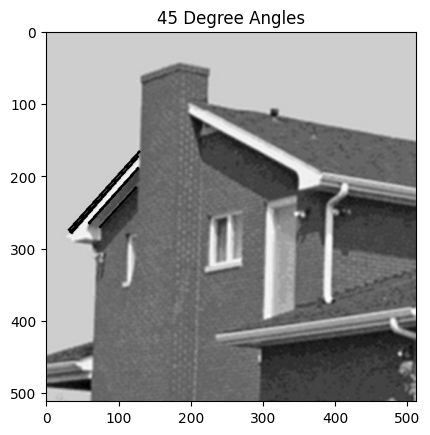

In [15]:
def line_angle(x1, y1, x2, y2):
    return np.degrees(np.arctan2(y2 - y1, x2 - x1))

angle_image = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = line_angle(x1, y1, x2, y2)
    if abs(angle - 45) <= 10 or abs(angle + 45) <= 10:
        cv2.line(angle_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(angle_image, cmap='gray')
plt.title('45 Degree Angles')
plt.show()
     

### **Conclusion** ###

Thus the task to extract feature descriptors from the image has been implemented successfully. Extracted features like edges, lines and points etc. Used detection techniques like ORB for points detection and canny for edge detection. Used HoughLineTransform for line detection.